In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
file_path = "/content/drive/MyDrive/Project Datasets/marketing_campaign.csv"
df = pd.read_csv(file_path, sep='\t')

In [4]:
print("Dataset Shape:", df.shape)

Dataset Shape: (2240, 29)


In [6]:
print("Column Info:")
df.info()

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240

In [7]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [8]:
df = df.dropna(subset=['Income'])

In [10]:
from datetime import datetime

# Convert Dt_Customer to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)

# Create feature: Customer_Tenure
df['Customer_Tenure'] = (datetime(2015, 1, 1) - df['Dt_Customer']).dt.days

# Total amount spent
df['TotalSpend'] = df[['MntWines', 'MntFruits', 'MntMeatProducts',
                       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Total purchases
df['TotalPurchases'] = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

In [12]:
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2216.000000  2216.000000    2216.000000  2216.000000  2216.000000   
mean    5588.353339  1968.820397   52247.251354     0.441787     0.505415   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2814.750000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8421.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   
std     3249.376275    11.985554   25173.076661     0.536896     0.544181   

                         Dt_Customer      Recency     MntWines    MntFruits  \
count                           2216  2216.000000  2216.000000  2216.000000   
mean   2013-07-10 11:29:27.509025280    49.012635   305.091606    26.356047   
min              2012-07-30 00:00:00     0.000000

In [13]:
sns.set(style="whitegrid")

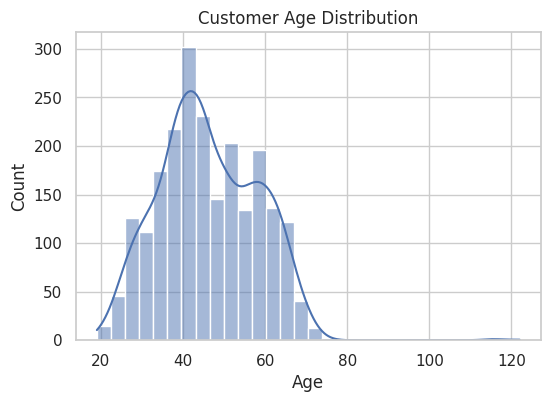

In [22]:
# Age distribution
plt.figure(figsize=(6, 4))
df['Age'] = 2015 - df['Year_Birth']
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

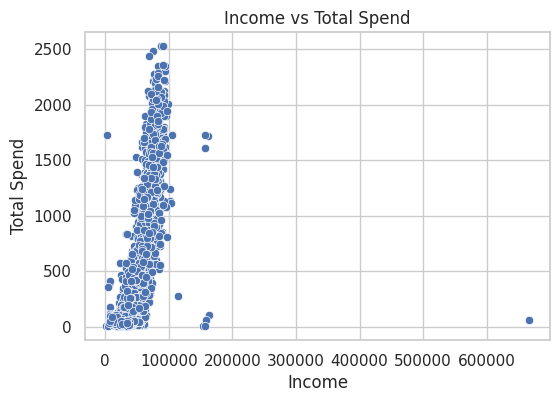

In [21]:
# Income vs Total Spend
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Income', y='TotalSpend', data=df)
plt.title("Income vs Total Spend")
plt.xlabel("Income")
plt.ylabel("Total Spend")
plt.show()

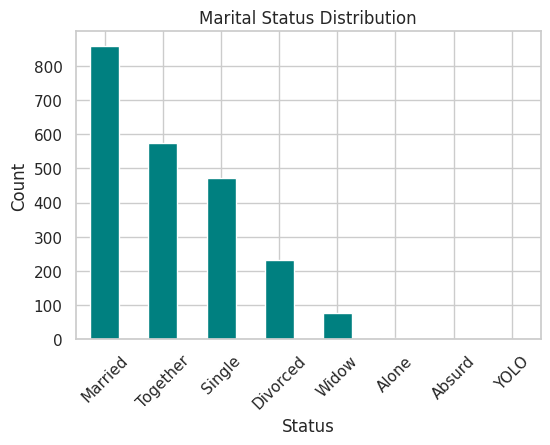

In [16]:
# Marital Status count
plt.figure(figsize=(6, 4))
df['Marital_Status'].value_counts().plot(kind='bar', color='teal')
plt.title("Marital Status Distribution")
plt.xlabel("Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

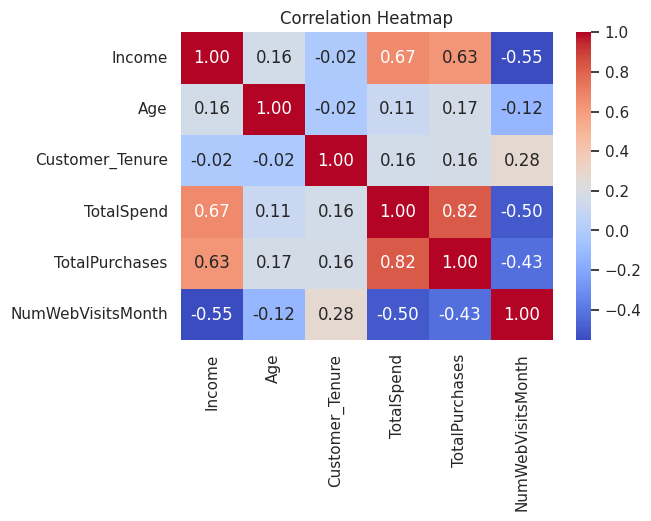

In [20]:
# Correlation heatmap
plt.figure(figsize=(6, 4))
selected_cols = ['Income', 'Age', 'Customer_Tenure', 'TotalSpend', 'TotalPurchases', 'NumWebVisitsMonth']
sns.heatmap(df[selected_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()